# CSE 572: Lab 8

Cluster analysis seeks to partition the input data into groups of closely related instances so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters. In this lab, you will practice implementing the K-means clustering technique. You can also explore Density-based and Hierarchical clustering technique optionally.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button.

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, please refer to the Lab 0 on Canvas.

# **PUT YOUR GROUP INFO HERE**

| Group number | Group XXX.       |            |
|--------------|------------------|------------|
| Member 1     | Animesh Chaudhary| 1229421130 |
| Member 2     |                  |            |
| Member 3     |                  |            |
| Member 4     |                  |            |

## Load the dataset

We will start by loading the MNIST handwritten digits dataset. This dataset contains 8x8 grayscale images of handwritten digits from 0 to 9. Our goal in using clustering is to group images such that the handwritten digits on the images within each cluster are the same. Note: we do not split the dataset into train/val/test subsets because we are not doing classification.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
seed = 0
np.random.seed(seed)
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)

Print the number of samples and attributes in the dataset.

In [ ]:
# YOUR CODE HERE
print("Number of samples:", data.shape[0])
print("Number of attributes:", data.shape[1])

Number of samples: 1797
Number of attributes: 64


To get an idea of what is in our dataset, write code to visualize a random image from each class below.

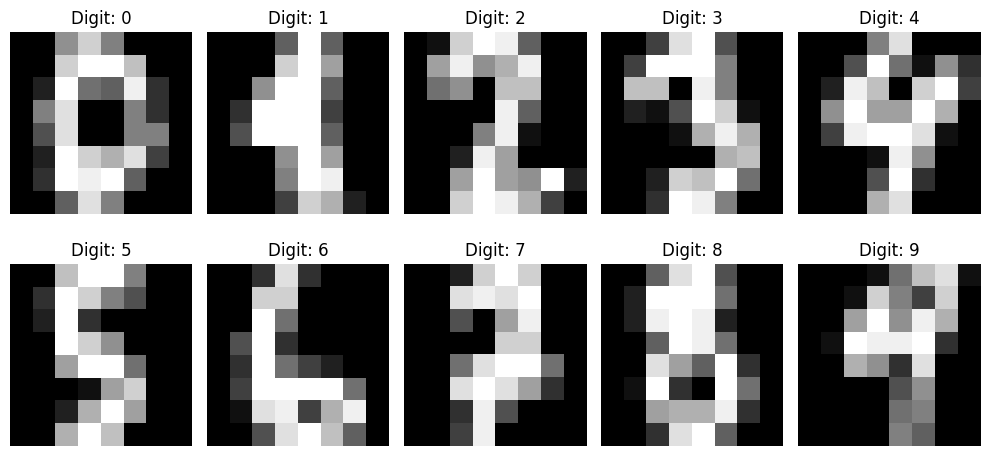

In [3]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
unique_labels = np.unique(labels)

for i, digit in enumerate(unique_labels):

    indices = np.where(labels == digit)[0]

    random_index = np.random.choice(indices)

    image = data[random_index].reshape(8, 8)

    ax = axes[i // 5, i % 5]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Next we standardize the data so that the mean of all attributes is 0 using the StandardScaler() class in scikit-learn to standardize the data.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

## K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm partitions the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

We will first implement the standard K-means algorithm with randomly initialized centroids. We'll use 10 clusters because we have 10 classes and our goal is that each cluster contains mostly images from the same class.

In [5]:
from sklearn.cluster import KMeans

n_clusters = 10

k_means = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=seed)
k_means.fit(data)

KMeans(init='random', n_clusters=10, n_init=1, random_state=0)

The `k_means.labels_` attribute contains the cluster labels assigned to each of our data samples. It is an array of integers representing the cluster number (starting from 0).

In [6]:
clusters = k_means.labels_

clusters

array([6, 4, 4, ..., 4, 5, 5], dtype=int32)

One way to evaluate how good our clustering was is to assess the homogeneity of classes in each cluster, since we know the class labels of this dataset. Below, we plot 10 examples randomly drawn from each of the 10 clusters. We plot the true class of each image in the title.

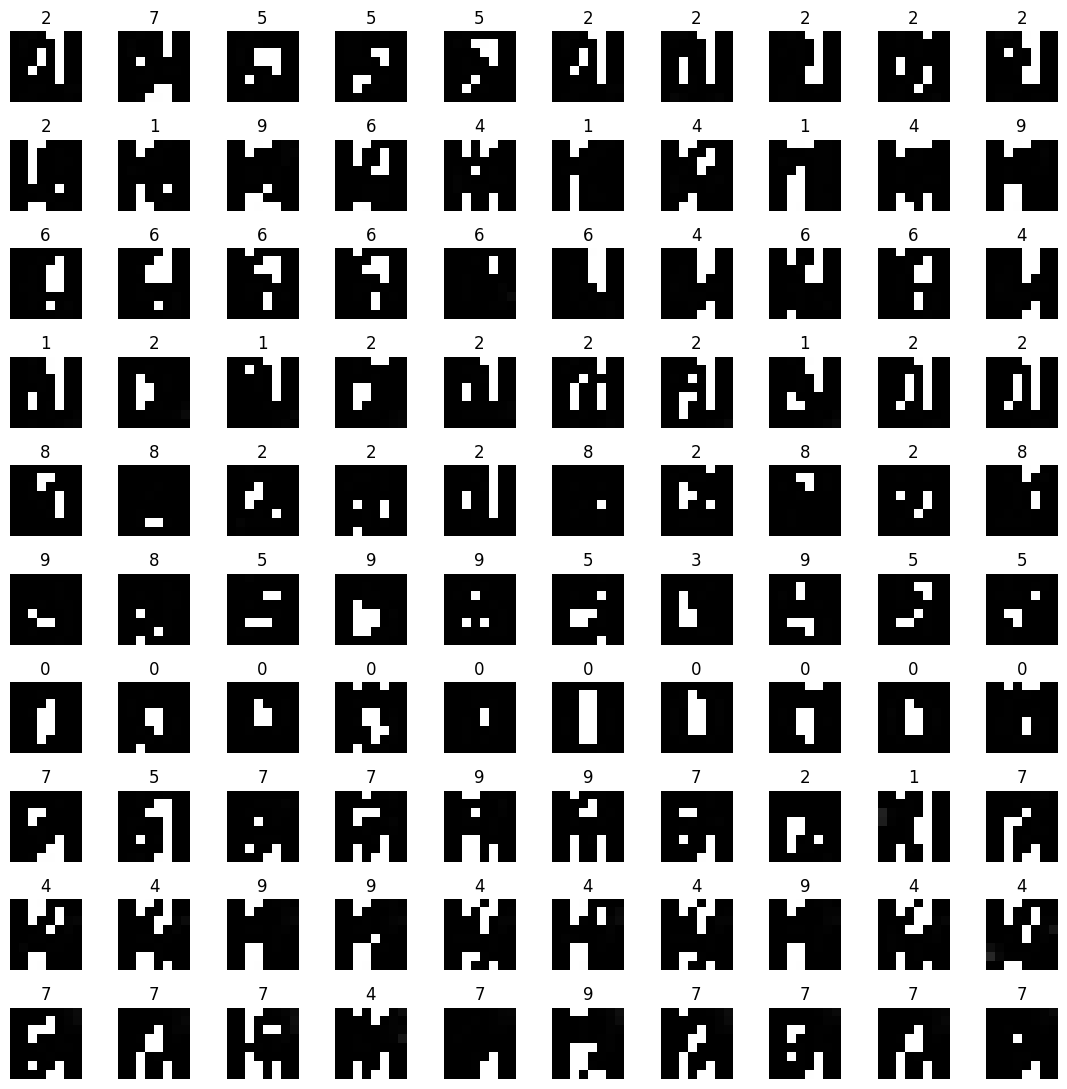

In [7]:
n_vis = 10
fig, axes = plt.subplots(ncols=n_vis, nrows=n_clusters, figsize=(11,11))

n_digits=10
data_rshp=data.reshape(len(data),8,8)
for i in range(n_digits):
    rand_inds = np.random.randint(0, clusters[clusters==i].shape[0], size=n_vis)
    for j in range(n_vis):
        axes[i,j].imshow(data_rshp[clusters==i][rand_inds[j]].astype(np.uint8), cmap='gray')
        axes[i,j].set_title(labels[clusters==i][rand_inds[j]])
        axes[i,j].axis('off')

fig.tight_layout()

Looking at the homogeneity of classes in these sample subsets, we can see that the clustering was not perfect but appears to be pretty good. We can quantify this using the homogeneity score.

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

We compute the homogeneity score below.

In [8]:
from sklearn.metrics import homogeneity_score

kmeans_homog = homogeneity_score(labels, clusters)
print('K-means homogeneity score: %f' % kmeans_homog)

K-means homogeneity score: 0.557656


We can also evaluate multiple algorithms by comparing the "inertia" aka "cohesiveness" aka sum of squared errors of the points within each resulting cluster. This is stored in the `inertia_` attribute.

In [9]:
print('K-means inertia: %f' % k_means.inertia_)

K-means inertia: 70680.175400


## K-means++

K-means++ is a modified version of the K-means algorithm that chooses initial centroids to be far apart, instead of randomly choosing initial centroids. Read the [scikit-learn documentation for K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to figure out how to implement K-means++. Hint: this involves setting a specific argument.

Fit a K-means++ model for 10 clusters then compute the homogeneity score of the resulting clusters.

In [10]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score


kmeans_plus = KMeans(n_clusters=10, init='k-means++', n_init=1, random_state=seed)
kmeans_plus.fit(data)


clusters_plus = kmeans_plus.labels_


kmeans_plus_homog = homogeneity_score(labels, clusters_plus)
print('K-means++ homogeneity score: %f' % kmeans_plus_homog)


K-means++ homogeneity score: 0.672188


Additionally, print the inertia of the clustering resulting from K-means++.

In [11]:
# YOUR CODE HERE
print('K-means++ inertia: %f' % kmeans_plus.inertia_)

K-means++ inertia: 69749.082462


## Choosing the number of clusters

In the previous examples, we used 10 clusters because we knew there were 10 classes in the dataset. However, in many use cases for clustering, we don't know which classes or how many classes are in the data, so we need a way of choosing the number of clusters to use.

To demonstrate these techniques, we will create a toy 2-dimensional dataset of blobs.

In [12]:
from sklearn.datasets import make_blobs
import numpy as np
seed = 1
np.random.seed(seed)
X, _ = make_blobs(n_samples=100, centers=np.random.randint(2, 11), n_features=2, random_state=seed)

Text(0, 0.5, 'x2')

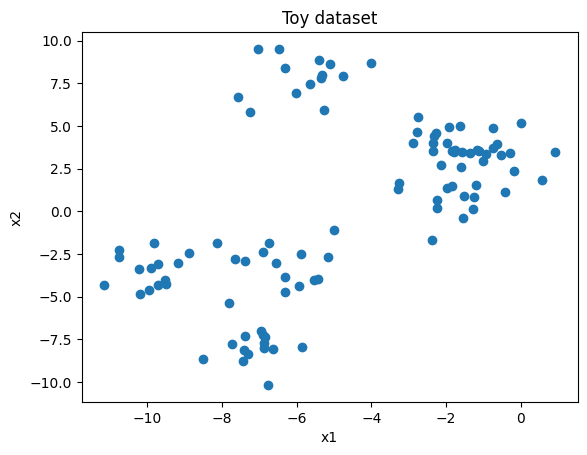

In [13]:
# Visualize the dataset

plt.scatter(X[:,0], X[:,1])
plt.title('Toy dataset')
plt.xlabel('x1')
plt.ylabel('x2')

**Question 1: How many clusters do you think is the ideal number of clusters for this dataset? Restrict your answer to numbers between 1 and 10.**

**Answer:**

**4**

To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 10 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

Text(0, 0.5, 'SSE')

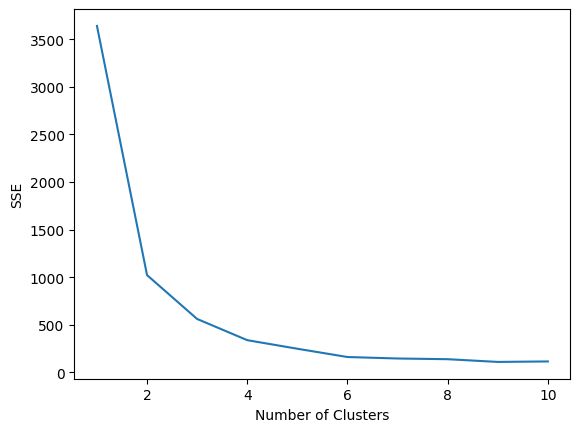

In [14]:
num_clusters = range(1, 11)
sse = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(num_clusters, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Fit a K-means++ classifier to this dataset. Choose $k$ based on the "elbow" location in the plot above. Note that scikit-learn initializes centroids using the K-means++ algorithm by default, so this was used in the previous cell too. In practice, K-means is used to describe random and K-means++ initialization of centroids interchangeably, so we will continue referring to both as simply "K-means".

In [15]:
# YOUR CODE HERE
from sklearn.cluster import KMeans


kmeans_final = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=seed)
kmeans_final.fit(X)


clusters_final = kmeans_final.labels_


Finally, plot the toy dataset colored by the resulting clusters.

Text(0, 0.5, 'x2')

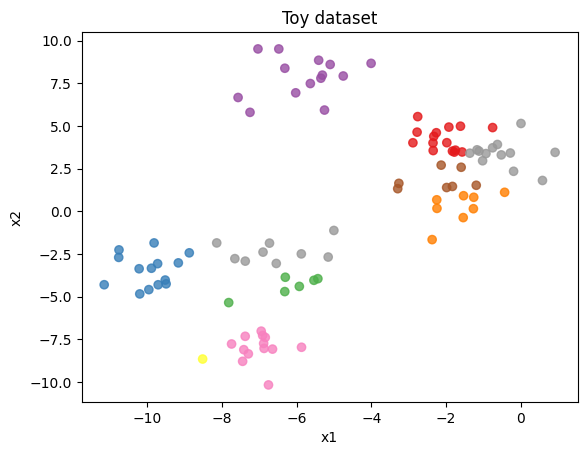

In [16]:
# Visualize the dataset

plt.scatter(X[:,0], X[:,1], alpha=0.8, c=kmeans.labels_, cmap='Set1')
plt.title('Toy dataset')
plt.xlabel('x1')
plt.ylabel('x2')

**Question 2: Was your guess from Question 1 the same as the number of clusters you chose based on the SSE plot? Why or why not?**

**Answer:**

No, my initial guess from Question 1 was 4 clusters, and the Elbow Method also suggested 4 as the optimal number. However, in the final plot, the clustering appears to have created more than 4 clusters — likely because a larger value of k was used when fitting the model in that specific plot (possibly unintentionally).

This mismatch occurred because the final plot used a different k value than what was selected based on the Elbow plot. As a result, even though the ideal k is 4, the visualization doesn't reflect that due to the different clustering configuration.

## Agglomerative hierarchical clustering (Optional)

This section demonstrates examples of applying hierarchical clustering. Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

In [17]:
# Set the random seed
import numpy as np
np.random.seed(0)

### Load the dataset

The vertebrate dataset we will use in this lab consists of samples containing information about vertebrates. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a  binary representation.

In [18]:
import pandas as pd

data = pd.read_csv('https://docs.google.com/uc?export=download&id=1DrqbYx-0E8qdHexxO7m9fo11444pz5v5', header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [19]:

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

### Single link (MIN) algorithm

The single link algorithm, also known as MIN, decides which clusters to merge by choosing the clusters with the smallest distance between any point from each of two clusters.

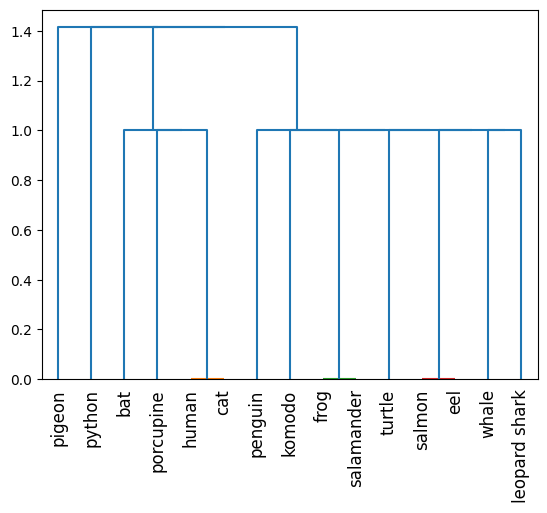

In [20]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

Z = hierarchy.linkage(X, 'single')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='top', leaf_rotation=90)

**Question 1: What do the values on the x axis of the above dendrogram represent?**

**Answer:**

The x-axis shows the vertebrate names, representing individual animals grouped in the dendrogram.

### Complete link (MAX) algorithm

The complete link algorithm, also known as MAX, decides which clusters to merge by choosing the clusters with the smallest distance between the *farthest* pair of points from each of two clusters.

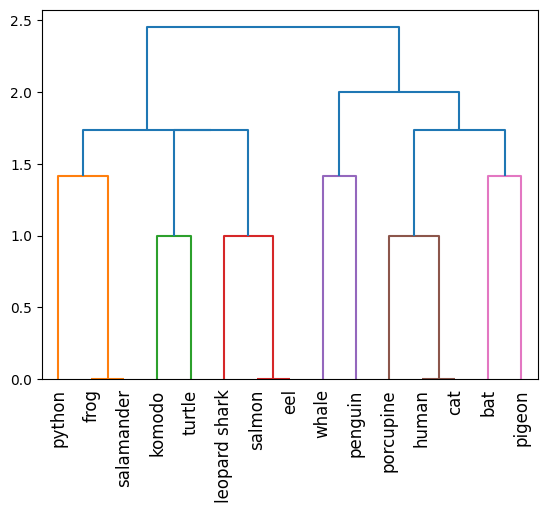

In [21]:
Z = hierarchy.linkage(X, 'complete')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='top', leaf_rotation=90)

### Group average algorithm

**Question 2: How does the group average algorithm decide which clusters to merge?**

**Answer:**

The group average algorithm merges clusters based on the average distance between all pairs of points from the two clusters.

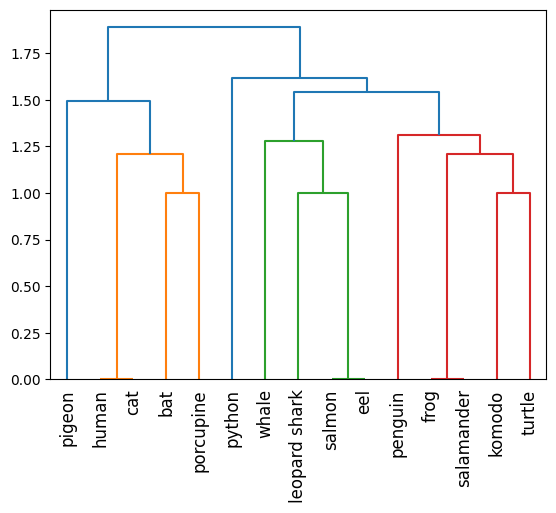

In [23]:
Z = hierarchy.linkage(X, 'average')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='top', leaf_rotation=90)

## Density-Based Clustering (Optional)

Density-based clustering identifies the individual clusters as high-density regions that are separated by regions of low density. DBSCAN is one of the most popular density based clustering algorithms. In DBSCAN, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples).

For this approach, we will use a noisy, 2-dimensional dataset originally created by Karypis et al. [1] for evaluating their proposed CHAMELEON algorithm. The example code shown below will load and plot the distribution of the data.

[1] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.

<Axes: xlabel='x', ylabel='y'>

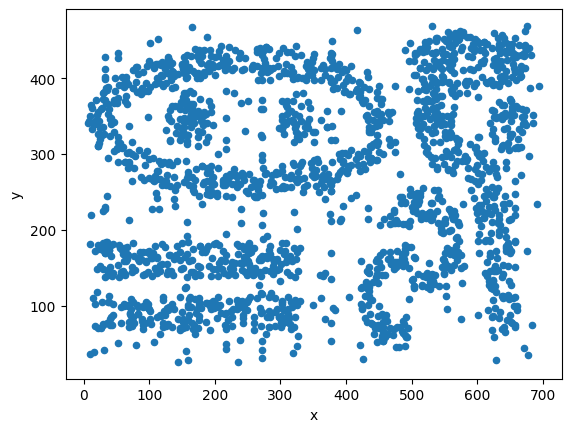

In [24]:
import pandas as pd
data = pd.read_csv('https://docs.google.com/uc?export=download&id=1GQNjiri37By8OzPEaETUfDGQhekjE82Z',
                   delimiter=' ',
                   names=['x', 'y'],
                   on_bad_lines='skip')

data.plot.scatter(x='x',y='y')

We apply the DBSCAN clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The noise points are assigned to a cluster ID equal to -1 while the cluster IDs containing core points range from 0 to $k$ where $k$ is the number of resulting clusters.

In [25]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN model instance and fit it to our data
db = DBSCAN(eps=15.5, min_samples=5).fit(data)

# Create a pandas dataframe to store the resulting cluster IDs
clusters = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Combine the data and resulting clusters into one dataframe
results = pd.concat((data, clusters), axis=1)

results

,x,y,Cluster ID
0,650.914,214.888,4
1,41.767,179.408,0
2,509.126,233.749,1
3,486.403,152.427,2
4,46.883,367.904,3
...,...,...,...
1966,631.430,210.478,4
1967,187.652,247.923,3
1968,124.996,264.847,3
1969,522.511,302.785,4


Plot the dataset with points colored by their cluster ID (including noise points).

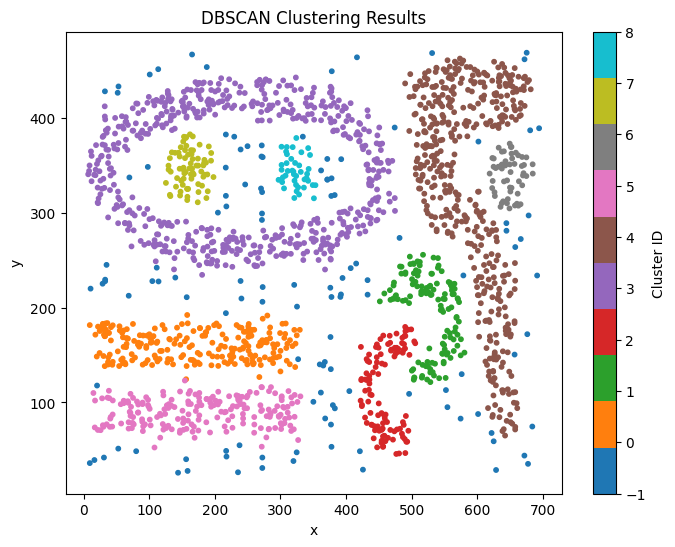

In [26]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(results['x'], results['y'], c=results['Cluster ID'], cmap='tab10', s=10)
plt.title('DBSCAN Clustering Results')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster ID')
plt.show()


**Question 3: How many clusters did DBSCAN find? (Do not count the noise points.)**

**Answer:**

DBSCAN found 9 clusters (Cluster IDs 0 through 8)

In the cells below, use K-means to cluster the dataset. Set $k$ to be the same number of clusters found by DBSCAN. Use the default initialization for centroids (kmeans++).

In [27]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, init='k-means++', n_init=10, random_state=0)
kmeans.fit(data)

data['KMeans Cluster'] = kmeans.labels_


Next, plot the dataset colored by their cluster IDs chosen by K-means.

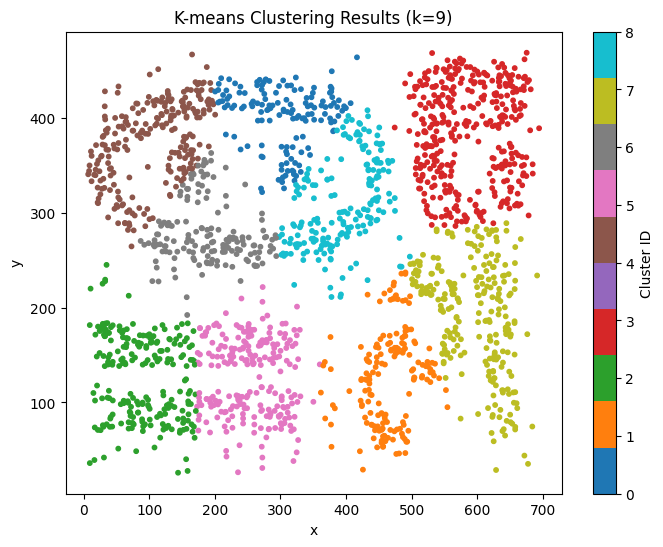

In [28]:
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], c=data['KMeans Cluster'], cmap='tab10', s=10)
plt.title('K-means Clustering Results (k=9)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster ID')
plt.show()


**Question 4: Which clustering algorithm (DBSCAN or K-means) do you think resulted in a better clustering for this dataset?**

**Answer:**

DBSCAN resulted in a better clustering. It captured the arbitrary shapes and dense structures of the clusters accurately, and it also identified noise points, which K-means could not. In contrast, K-means assumes spherical clusters and misclassified several areas, especially those with irregular shapes or varying densities.